In [1]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)

        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

In [14]:
from os.path import join
import os

# import tifffile as tiff
import pandas as pd
import random
import cv2
from matplotlib import pyplot as plt
# import albumentations as A
import numpy as np
from PIL import Image
# from albumentations import *
# from fastai.vision.all import *
from config import config
id = 2174
img = cv2.imread(f"/home/wangjingqi/input/hubmap-organ-segmentation/1024/1/hpa_images/{id}.png")
mask =np.asarray (Image.open(f"/home/wangjingqi/input/hubmap-organ-segmentation/1024/1/masks/{id}.png"))
# def CutOut(img,mask,p=0.3):
#     m = np.ones((768,768,1),dtype=np.uint8)
#     transfer = Compose(
#         [
#             CoarseDropout(max_holes = 32,min_holes=16,max_height=64,max_width=64,min_height=16,min_width=16,fill_value=0,p=1)
#         ]
#     )
#     m = transfer(image=m)["image"]

#     ms = np.concatenate([m,m,m],axis=-1)
#     img = img*ms+(1-ms)*245
#     mask = mask*m.squeeze(-1)
#     return img,mask
from data_aug import selfcopypaste,CutOut
image_heavy,mask_heavy =selfcopypaste(img,mask)

# augmented = transfer(image=img, mask=mask)
# image_heavy,mask_heavy = augmented["image"],augmented["mask"]

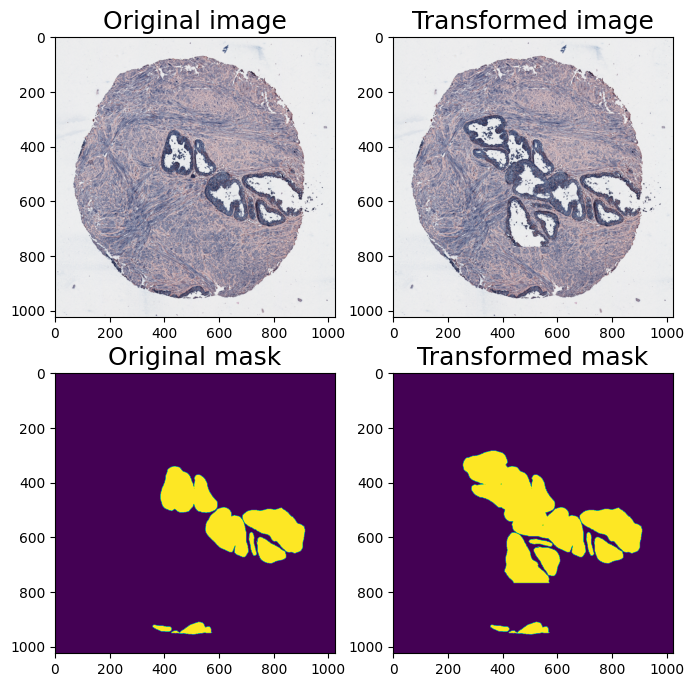

In [15]:
visualize(image_heavy,mask_heavy,img,mask)

In [4]:
import torch
torch.stack([torch.tensor([1,2,3])],dim=0).shape

torch.Size([1, 3])

In [5]:
import os
import torch
checkpoint_path = '/home/wangjingqi/hthb/k-fold-checkpoint'
# selected_model = ["-cutout2021"]
selected_model = ["-cutout2021","nocutout2021","-2021"]
MODELS =[ os.path.join(checkpoint_path,model_name) for model_name in os.listdir(checkpoint_path) if  model_name.split("_")[-1].split(".")[0] in selected_model ]

models = []
len(MODELS)

14

In [2]:
for fm in MODELS:
    state_dict = torch.load(fm,map_location=torch.device('cpu'))
    saved = dict(model=state_dict,image_size=1024)
    torch.save(saved,os.path.join("/home/wangjingqi/hthb/submit",os.path.basename(fm)))

In [3]:
len(os.listdir("/home/wangjingqi/hthb/submit"))

30

In [2]:

fname = os.listdir("/home/wangjingqi/input/hubmap-organ-segmentation/1024/1/tta_lung_masks")
for f in fname:
    image = cv2.imread(os.path.join("/home/wangjingqi/input/hubmap-organ-segmentation/1024/1/tta_lung_masks",f),cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image,(1536,1536),
                             interpolation = cv2.INTER_LINEAR)
    cv2.imwrite(os.path.join("/home/wangjingqi/input/hubmap-organ-segmentation/1536/1/tta_lung_masks",f),image)

    

In [4]:
import numpy as np
m = np.load("/home/wangjingqi/input/dataset/psg/segmentations/val2014/73.npy")
m.shape

(133, 7, 7)

In [3]:
o = []
for i in range(m.shape[0]):
    if m[i].sum() > 0:
        o.append(m[i])

In [16]:
o[1]

array([[0.        , 0.        , 0.        , 0.        , 0.22460938,
        0.4169922 , 0.46191406],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.3515625 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5859375 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.26171875],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]], dtype=float32)

In [30]:

out = []
with open("/home/wangjingqi/hthb/网安.txt", "r") as f:
    for line in f.readlines():
        line = line.strip('\n')  #去掉列表中每一个元素的换行符
        if line is not None and line != '':
            out.append(line.split(' '))

In [31]:
import pandas as pd

csv = pd.DataFrame(columns=[i for i in range(len(out[0]))])
for line in out:
    try:
        csv.loc[len(csv)] = [eval(l) for l in line]
    except:
        pass

In [36]:
csv.sort_values(by=19,ascending=False,inplace=True)
csv.to_csv("/home/wangjingqi/hthb/网安sorted.txt")

In [1]:
import pickle
pickle.load(open("/home/wangjingqi/hthb/th/coat_cutmix2021-4-th.pkl","rb"))

{0: defaultdict(int,
             {0.1: 12,
              0.15000000000000002: 14,
              0.20000000000000004: 21,
              0.25000000000000006: 38,
              0.30000000000000004: 46,
              0.3500000000000001: 94,
              0.40000000000000013: 141,
              0.45000000000000007: 157,
              0.5000000000000001: 150,
              0.5500000000000002: 107,
              0.6000000000000002: 111,
              0.6500000000000001: 68,
              0.7000000000000002: 51,
              0.7500000000000002: 29,
              0.8000000000000002: 16,
              0.8500000000000002: 35}),
 1: defaultdict(int,
             {0.1: 300,
              0.15000000000000002: 111,
              0.20000000000000004: 87,
              0.25000000000000006: 84,
              0.30000000000000004: 91,
              0.3500000000000001: 86,
              0.40000000000000013: 70,
              0.45000000000000007: 44,
              0.5000000000000001: 44,
              0.5

In [75]:
i = 0

In [88]:
import pandas as pd

s = pd.read_csv(f"/home/wangjingqi/hthb/log/1024_coat_-cutout2021-{i}-train.csv")
m = pd.read_csv(f"/home/wangjingqi/hthb/log/1024_coat_allmasks-2021-{i}-train.csv")
o = pd.read_csv(f"/home/wangjingqi/hthb/log/1024_fcoat_stain3allmasks-2021-{i}-train.csv")
i += 1

In [89]:
s[s["dice_th"]>=s["dice_th"].max()],m[m["dice_th"]>=m["dice_th"].max()],o[o["dice_th"]>=o["dice_th"].max()]

(     Unnamed: 0  train_loss   valid_loss  dice_th  dice_mutith
 101         101        0.672       0.921    0.882        0.881
 170         170        0.496       0.991    0.882        0.888,
      Unnamed: 0  train_loss   valid_loss  dice_th  dice_mutith
 146         146        0.513       0.889    0.895        0.896,
      Unnamed: 0  train_loss   valid_loss  dice_th  dice_mutith
 129         129        0.627       0.960    0.893        0.893
 130         130        0.621       0.927    0.893        0.891)

In [90]:
nnion

NameError: name 'nnion' is not defined

In [ ]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image
img = Image.open("/home/wangjingqi/input/hubmap-organ-segmentation/768/1/hpa_images/4777.png")
# img.show()

In [ ]:
import torch
m = torch.load("/home/wangjingqi/hthb/models/senformer_swin_tiny_512x512_ade20k.pth",map_location="cpu")
# ck = {}
# for k,v in m.items():
#     if "learners" in k.split(".") and "queries" not in k.split("."):
#         ck.update({(".").join(k.split(".")[2:]):v})
# torch.save(ck,"/home/wangjingqi/hthb/models/swin_tiny_512x512_leaners.pth")

In [ ]:
for k,v in m.items():
    print(k,v.shape)

In [ ]:
from config import config
model,split_layers =config.models[config.model_name]
model = model(config,False)
model.learners.load_state_dict(ck,strict=False)

In [ ]:
from mutisampledropout import DropBlock2D
d = DropBlock2D(0.1,30)

In [ ]:
import torch
import numpy as np
imgt = torch.from_numpy(np.asarray(img)).permute(2,0,1).unsqueeze(0)
dimgt = d(imgt)
dimg =np.asarray (dimgt.squeeze(0).permute(1,2,0),dtype=np.uint8)

In [ ]:

dimg = Image.fromarray(dimg)


In [ ]:
dimg.show()